<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий ревьюера v1</h1>

Денис привет! Меня зовут Дмитрий Пышненко, и я буду проверять твой проект. Предлагаю общаться на «ты» если ты не против 😊 Но если нет, то дай знать, и мы перейдем на "вы". 
    
Для своих комментариев я буду использовать цветовую разметку:

<div class="alert alert-success">
    <b>Успех:</b> все сделано правильно.
</div>
<div class="alert alert-warning">
    <b>Есть замечания:</b> так выделены небольшие замечания которые не критичны, но было бы здорово исправить. Если таких замечаний немного, то такой проект может быть принят.
</div>
<div class="alert alert-danger">
    <b>Нужно переделать:</b> есть замечания которые необходимо исправить или доделать для сдачи проекта.
</div>
    
Я буду поддерживать версионность комментариев, и при следующих итерациях я буду оставлять ячейки с новой версией v2 (v3 и.т.д.)"
    
Если у тебя есть вопросы, замечания или отвечаешь на комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии: 
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

<div style="border:solid green 2px; padding: 20px">
<b>Комментарий ревьюера v1:</b>
    
<b>Общее впечатление:</b> 
    
- У тебя получилась отличная работа, поздравляю! Очень чистый код и структурированный подход к решению задачи. 
- Осталось исправить совсем чуть-чуть для сдачи проекта (буду также рад исправлениям желтых:):
    - Добавить дополнительную проверку данных.
    - Поправить графики.
    - Поправить баг в коде.
    
Буду ждать новую версию на повторную проверку и буду также очень рад исправлениям желтых комментариев 😇 Успехов!

</div>

<div style="border:solid green 2px; padding: 20px">
<b>Комментарий ревьюера v2:</b>
    
Очень здорово, что дополнительно поработал над проектом и внес улучшения на комментарии! 
    
Остался только один небольшой комментарий по поводу сборки выборок для первой метрики (среднее количество заказов между группами). 
    
Буду ждать новую версию на повторную проверку!

<div style="border:solid green 2px; padding: 20px">
<b>Комментарий ревьюера v3:</b>
    
Спасибо, что внес дополнительные улучшения в свой проект.
    
Было интересно его проверять и осталось только пожелать тебе успехов на следующих спринтах 🍀
    
А тут можно найти больше примеров того, как проводить А/Б тестирование - 

https://habr.com/ru/company/boodet_online/blog/498688/
    
https://vc.ru/u/1174886-koptelnya/413265-chto-takoe-a-b-testirovanie-i-kak-provesti-ego-pravilno-urok-1    
 
    
</div>

# Описание проекта

С целью увеличения выручки интернет магазина был определен ряд гипотиз, в ходе проекта необходимо проанализировать гипотезы, расставить из по приоритету, провести А/В-тестирование и проанализировать полученные результаты.

## Цели и задачи проекта


Цель проекта - приоритизировать гипотезы, проанализировать результаты А/В-теста, сдалать вывод.

Задачи проекта:
1. Изучение и предобработка (при необходимости) имеющихся данных.
2. Приоритизация гипотез.
3. Анализ результатов А/В-теста.
4. Формулирвоание вывода по результатам А/В-теста.

<div class="alert alert-success">
<b>Комментарий ревьюера v1:</b>
    
Здорово, что оставил описание проекта и данных. Описание проекта важная часть работы так как она дает вводные для стороннего читателя (будь то коллега-ревьюер или же бизнес-заказчик). На данном этапе также полезно выполнять декомпозицию задачи.


## Изучение и предобработка данных

Загрузим необходимые библиотеки для изучения данных, анализа и проведения А/В-тестирования.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math as mth
import datetime as dt
import scipy.stats as stats
pd.options.display.max_colwidth = 1 #отображение полного содержания столбца

Прочтем данные из csv файлов.

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

Изучим данные таблицы hypothesis.

In [3]:
hypothesis.info()
print(hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
                                                                                                     Hypothesis  \
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   

Данные имеют корректный тип, пропуски отсутствуют, наименование столбоцов корректны, дальнейшая предобработка данных таблицы hypothesis не требуется.

Изучим данные таблицы orders.

In [4]:
orders.info()
print(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
   transactionId   visitorId        date  revenue group
0  3667963787     3312258926  2019-08-15  1650     B   
1  2804400009     3642806036  2019-08-15  730      B   
2  2961555356     4069496402  2019-08-15  400      A   
3  3797467345     1196621759  2019-08-15  9759     B   
4  2282983706     2322279887  2019-08-15  2308     B   


Переименуем столбец transactionId в transaction_id и столбец visitorId в visitor_id, изменим тип данных в столбце date на datetime64[ns].

In [5]:
orders.rename(columns = {'transactionId' : 'transaction_id', 'visitorId' : 'visitor_id'}, inplace = True)
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.info()
print(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
   transaction_id  visitor_id       date  revenue group
0  3667963787      3312258926 2019-08-15  1650     B   
1  2804400009      3642806036 2019-08-15  730      B   
2  2961555356      4069496402 2019-08-15  400      A   
3  3797467345      1196621759 2019-08-15  9759     B   
4  2282983706      2322279887 2019-08-15  2308     B   


Данные приведены к корректному типу, столбцы переименованы, пропуски отсутствуют, предобработка данных в таблице orders завершена.

Изучим данные таблицы visitors.

In [6]:
visitors.info()
print(visitors.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
         date group  visitors
0  2019-08-01  A     719     
1  2019-08-02  A     619     
2  2019-08-03  A     507     
3  2019-08-04  A     717     
4  2019-08-05  A     756     


Изменим тип данных в столбце date на datetime64[ns].

In [7]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors.info()
print(visitors.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
        date group  visitors
0 2019-08-01  A     719     
1 2019-08-02  A     619     
2 2019-08-03  A     507     
3 2019-08-04  A     717     
4 2019-08-05  A     756     


Данные приведены к корректному типу, пропуски отсутствуют, наименование столбоцов корректны, предобработка данных таблицы visitirs завершена.

<div class="alert alert-info"> <b>Комментарий студента:</b> Дополнительная обработка данных</div>

Уточним уникальные значения в столбце group таблиц orders и visitors.

In [8]:
print(orders['group'].unique())
print(visitors['group'].unique())

['B' 'A']
['A' 'B']


В таблицах orders и visitors представлены результаты только А и В групп, лишних данных в этой части нет.

Определим даты начала и окончания А/В-теста, данные о датах представлены в таблицах orders и visitors.

In [9]:
print('Дата первого заказа:', orders['date'].min(), '\n'
     'Дата первого визита:', visitors['date'].min(), '\n'
     'Дата последнего заказа:', orders['date'].max(), '\n'
     'Дата последнего визита:', visitors['date'].max(), '\n')

Дата первого заказа: 2019-08-01 00:00:00 
Дата первого визита: 2019-08-01 00:00:00 
Дата последнего заказа: 2019-08-31 00:00:00 
Дата последнего визита: 2019-08-31 00:00:00 



Дата начала А/В-теста - 1 августа 2019 года, дата окончания А/В-теста - 31 августа 2019 года.

Рассмортим id клиентов в таблицах orders и visits, определим, нет ли клиентов с одинаковыми id среди групп А и В. Также выведем общее число участников.

In [10]:
id=orders.groupby('visitor_id').agg({'group':'nunique'}).reset_index()
id=id[id['group']==2]['visitor_id']
print(id.count())
print(orders['visitor_id'].nunique())

58
1031


Среди всех пользователей (1031), которые принимали участие в А/В-тестировании, зарегистрированы 58, id которых фигурирует как в результатах группы А, так и в результатах группы В. Определим долю этих пользователей среди всех участников.

In [11]:
round(100*id.count()/orders['visitor_id'].nunique(),2)

5.63

С учетом доли пользователей, принимавших участие в А и В группах, в 5,63% от общего количества участников, а также в связи с некоректными результатами этих пользователей (невозможно оценить влияние изменений, проверяемых в А/В-тестировании, на действия таких участников: полученная от них прибыль, количество совершенных заказов и т.д.) предлагается исключить данных участников из таблицы orders.

In [12]:
orders = orders.loc[~orders['visitor_id'].isin(id.unique())]
print(orders['visitor_id'].nunique())

973


Пользователи с некорректными результатами исключены, общее число участников уменьшилось на количество удаленных пользователей.

Оценим количество пользователей в группе А и группе В.

In [13]:
print(orders[orders['group']=='A']['visitor_id'].nunique())
print(orders[orders['group']=='B']['visitor_id'].nunique())
print(orders['visitor_id'].nunique())
print('Доля участников группы А:', round(100*orders[orders['group']=='A']['visitor_id'].nunique()/orders['visitor_id'].nunique(),2))
print('Доля участников группы В:', round(100*orders[orders['group']=='B']['visitor_id'].nunique()/orders['visitor_id'].nunique(),2))

445
528
973
Доля участников группы А: 45.73
Доля участников группы В: 54.27


Доля участников групп А и В 46% и 54% соответственно, доля участников в каждой из групп оптимальна для проведения А/В-тестирования.

### Вывод по результатам предобрабокти данных

В рамках предобработки данных проведена следующая работа:
1. В таблицах orders и visitors данные в столбце date приведены к типу datetime64[ns].
2. Уточнены названия столбцов таблицы orders.
3. Определены дата начала А/В-теста - 1.08.2019, и дата окончания - 31.08.2019.
4. Из таблицы orders исключены пользователи, результаты деятельности которых щарегистрированы как в группе А, так и в группе В, их доля не более 5,6%.

В таблицах orders, visitors и hypothesis проведена предобработка данных, данные кррректны и могут быть использованы для решения задач проекта.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>
    
Здорово, что добавил подробную проверку данных 😇  

В целом ситуация с пользователями в двух группах неприятная и на реальном проекте стоит узнать у того кто собирал данные, что пошло не так. В данном случае пользователей не так много поэтому их также можно оставить как есть.

Кроме того мы не сможем идентифицировать данных пользователей в таблице с посещениями, а удалять их только из одной таблицы с заказами будет не совсем корректно для дальнейшего анализа.


<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера v1:</b>

Дополнительно было бы здорово добавить базовую проверку данных (подходят ли данные для анализа А/Б теста):
- Подтвердить количество групп в А/Б тесте и за какой период нам доступны данные (даты начала и окончания теста).
- Посмотреть на распределение количества пользователей в каждой группе.
- Проверить не попадают ли у нас пользователи в обе группы и принять решение о том, что с ними делать.

## Приоритизация гипотез

Проведем приоритизацию гипотез, указанных в таблице hypothesis, с помощью метода ICE.

<div class="alert alert-info"> <b>Комментарий студента:</b> Код уточнен</div>

In [14]:
pd.options.display.max_colwidth = 210 #отображение полного названия гипотез
hypothesis['ICE'] = round((hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts'], 2) #округление показателей ICE до 2 знаков после запятой
print(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                                                                                     Hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера v1:</b>
    
Можно добавить следующий код, чтобы отобразить полное название гипотез в таблицах: 
    
    pd.options.display.max_colwidth = 210
    
А также округлить для красоты ICE и отказаться от print()

Проведем приоритизацию гипотез, указанных в таблице hypothesis, с помощью метода RICE.

In [15]:
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
print(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                                                                                     Hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

Выведем все имеющиеся гипотезы с расчетом приоритезации методами ICE и RICE и столбцом Reach.

In [16]:
print(hypothesis[['Hypothesis', 'Reach', 'ICE', 'RICE']].sort_values(by='RICE', ascending=False))

                                                                                                     Hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

### Вывод по результатам приоритизации гипотез

В результате приоритизации гипотез получены следующие результаты:
- приоритизация методом ICE: лидируют гипотезы под номерами 8, 0 и 7;
- приоритизация методом RICE: лидируют гипотезы под номерами 7, 2 и 0.

Различия в результатах обуславливаются наличием при расчетах по методу RICE дополнительного параметра Reach (охват пользователей, которых затронут предлагаемые изменения). Для гипотезы под номером 7 значение Reach равно 10, с учетом формулы расчета значение RICE для гипотезы 7 в 10 раз больше значения ICE (полученные значения RICE=112 и ICE=11,2).

Таким образом наиболее приоритетной гипотезой выберем гипотезу под номером 7.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v1:</b>
    
Отлично! Все выполнено правильно. Фреймворки `ICE` и `RICE` были рассчитаны верно. И по результатам теперь понятно, как фактор охвата (Reach) влияет на общую ценность гипотезы.

Дополнительно было бы совсем здорово создать точечную диаграмму, чтобы сопоставить все метрики для каждой гипотезы и сравнить их.
    
Для стороннего читателя (например бизнес-заказчик) также было бы интересно добавить краткое описание фреймворков и как они работают.
    
Интересные примеры использования данных методов можно почитать тут:
    
- https://habr.com/ru/company/hygger/blog/424323/ 
- https://vc.ru/tribuna/260086-kak-delat-to-chto-prineset-bolshe-polzy-biznesu-i-ne-kosyachit-so-srokami    

## Анализ А/В-теста

### Кумулятивная выручка по группам

Определим кумулятивную выручку по дням для каждой группы А и В.

In [17]:
revenue_cumulative = orders.pivot_table(index='date', columns='group', values='revenue', aggfunc='sum').reset_index()
revenue_cumulative = revenue_cumulative.rename(columns={'A':'revenue_A', 'B':'revenue_B',})
revenue_cumulative['revenue_A_cum'] = revenue_cumulative['revenue_A'].cumsum(axis=0)
revenue_cumulative['revenue_B_cum'] = revenue_cumulative['revenue_B'].cumsum(axis=0)
print(revenue_cumulative.head())

group       date  revenue_A  revenue_B  revenue_A_cum  revenue_B_cum
0     2019-08-01     142779      59758         142779          59758
1     2019-08-02      91602     162043         234381         221801
2     2019-08-03     112473      67049         346854         288850
3     2019-08-04      41176      96890         388030         385740
4     2019-08-05      86383      89908         474413         475648


Построим графики кумулятивной выручки по группам.

<div class="alert alert-info"> <b>Комментарий студента:</b> Код уточнен</div>

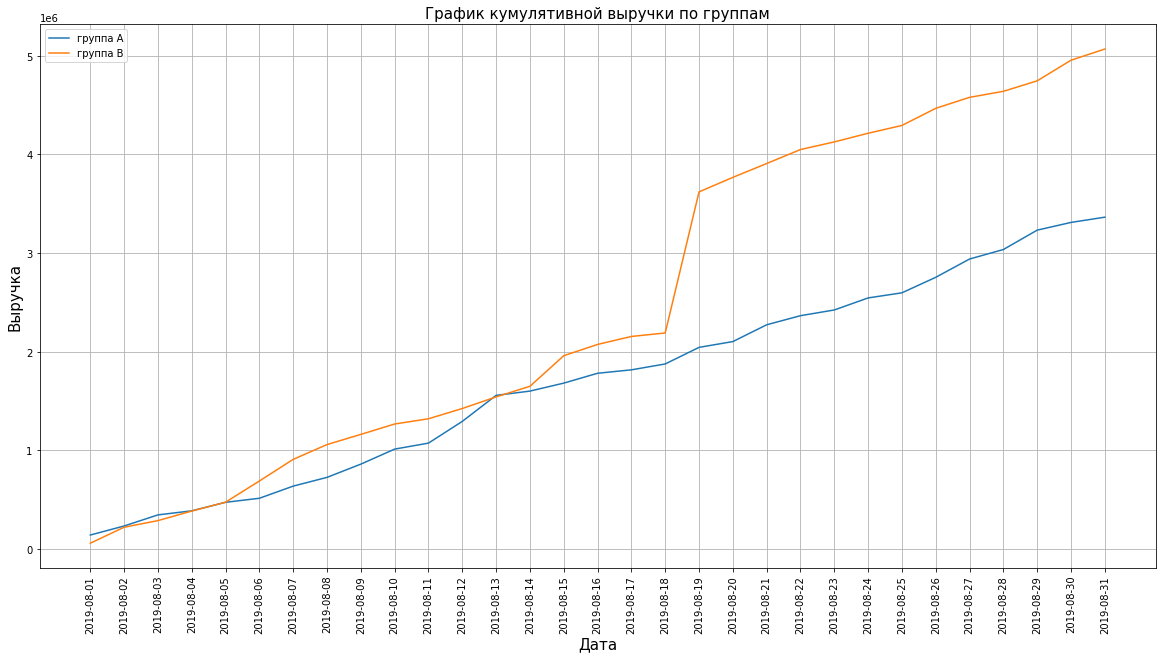

In [18]:
plt.figure(figsize=(20, 10))
plt.plot(revenue_cumulative['date'], revenue_cumulative['revenue_A_cum'], label='группа A')
plt.plot(revenue_cumulative['date'], revenue_cumulative['revenue_B_cum'], label='группа B')
plt.xticks(revenue_cumulative['date'], rotation = 90)
plt.legend()
plt.title('График кумулятивной выручки по группам', fontsize=15) #добавлено название графика
plt.xlabel('Дата', fontsize=15) #подписана ось х
plt.ylabel('Выручка', fontsize=15) #подписана ось у
plt.grid()
plt.show()

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера v1:</b>
    
Хочу попросить тебя добавить заголовок и подписи осей ко всем графикам.


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>
    
Спасибо, что поправил графики!

#### Вывод по анализу кумулятивной выручки по группам

По данным графика кумулятивной выручки для групп А и В можно сделать следующие выводы:
- кумулятивная выручка в обеих группах вцелом увеличивается равномерно;
- кумулятивная выручка в группе В выше, чем в группе А;
- наблюдается резкий рост выручки в группе В в промежутке с 18 по 19 августа.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v1:</b>
    
Согласен с выводами и предположениями.

### Кумулятивный средний чек по группам

Определим кумулятивный средний чек по дням для каждой группы А и В.

In [19]:
count_cumulative = orders.pivot_table(index='date', columns='group', values='transaction_id', aggfunc='count').reset_index()
count_cumulative = count_cumulative.rename(columns={'A':'count_order_A', 'B':'count_order_B',})
count_cumulative['cum_order_A'] = count_cumulative['count_order_A'].cumsum(axis=0)
count_cumulative['cum_order_B'] = count_cumulative['count_order_B'].cumsum(axis=0)
cumulative = revenue_cumulative.merge(count_cumulative, on='date', how='inner')
cumulative['avg_check_A'] = cumulative['revenue_A_cum']/cumulative['cum_order_A']
cumulative['avg_check_B'] = cumulative['revenue_B_cum']/cumulative['cum_order_B']
print(cumulative.head())

group       date  revenue_A  revenue_B  revenue_A_cum  revenue_B_cum  \
0     2019-08-01     142779      59758         142779          59758   
1     2019-08-02      91602     162043         234381         221801   
2     2019-08-03     112473      67049         346854         288850   
3     2019-08-04      41176      96890         388030         385740   
4     2019-08-05      86383      89908         474413         475648   

group  count_order_A  count_order_B  cum_order_A  cum_order_B  avg_check_A  \
0                 23             17           23           17  6207.782609   
1                 19             23           42           40  5580.500000   
2                 24             14           66           54  5255.363636   
3                 11             14           77           68  5039.350649   
4                 22             21           99           89  4792.050505   

group  avg_check_B  
0      3515.176471  
1      5545.025000  
2      5349.074074  
3      5672.64

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера v1:</b>
    
Не забывай, пожалуйста, про использование head, tail или sample при форматировании датафреймов. Если оставить эту таблицу "как есть", то при сохранении ноутбука, например, на github, таблица развернется во всю длину и займет значительную часть отчета.

Построим графики кумулятивных средних чеков по группам.

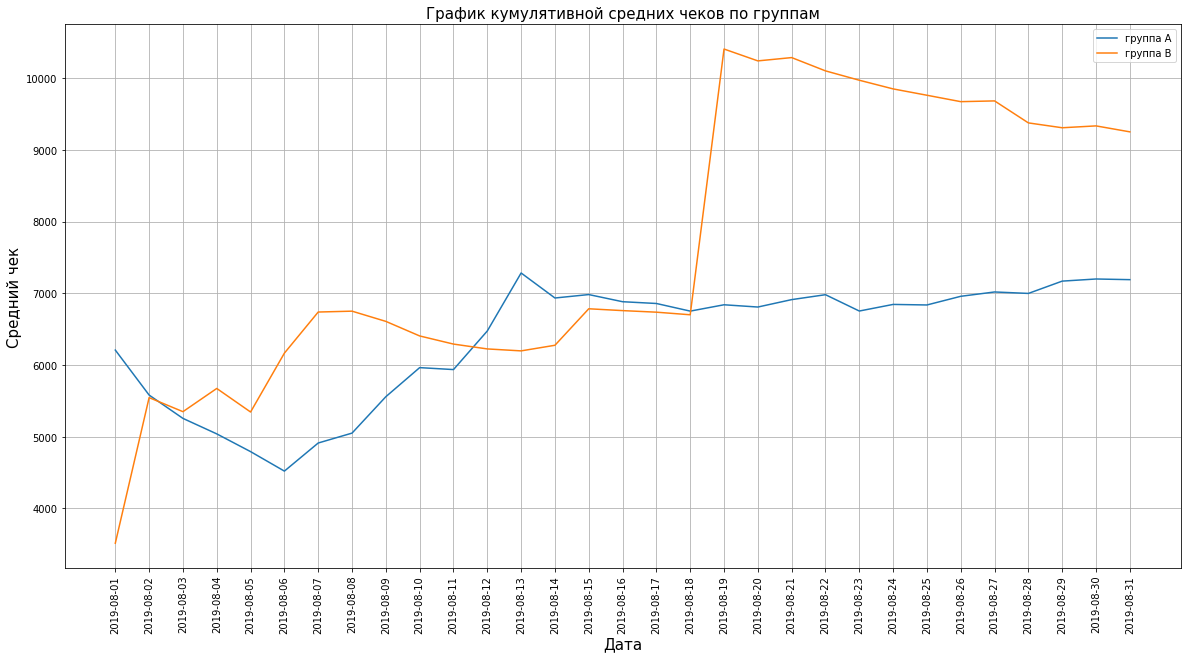

In [20]:
plt.figure(figsize=(20, 10))
plt.plot(cumulative['date'], cumulative['avg_check_A'], label='группа A')
plt.plot(cumulative['date'], cumulative['avg_check_B'], label='группа B')
plt.xticks(cumulative['date'], rotation = 90)
plt.title('График кумулятивной средних чеков по группам', fontsize=15) #добавлено название графика
plt.xlabel('Дата', fontsize=15) #подписана ось х
plt.ylabel('Средний чек', fontsize=15) #подписана ось у
plt.legend()
plt.grid()
plt.show()

#### Вывод по анализу кумулятивного среднего чека по группам

По данным графика кумулятивного среднего чека для групп А и В можно сделать следующие выводы:
- вцелом кумулятивный средний чек больше в группе В, наблюдается небольшое превышение стоимости среднего чека группы А в период с 12 по 18 августа;
- наблюдается резкое возрастание кумулятивного значения среднего чека в группе В с 18 по 19 августа, возрастание скорее связано с большим значением выручки, полученной 18 августа, по данным таблицы cumulative количество заказов в группе В выше чем в группе А, что также сказывается на среднем чеке заказов;
- с 19 августа до окончания проведения А/В теста наблюдается снижение кумулятивного среднего чека группы В.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v1:</b>

Тут также все верно.

### Анализ относительного изменения кумулятивных сердних чеков групп А и В

Определим относительное изменение кумулятивного среднего чека по дням между группами А и В.

In [21]:
cumulative['relative'] = (cumulative['avg_check_B']/cumulative['avg_check_A'])-1
print(cumulative['relative'].head())

0   -0.433747
1   -0.006357
2    0.017831
3    0.125670
4    0.115255
Name: relative, dtype: float64


Построим график относительного изменения кумулятивного среднего чека.

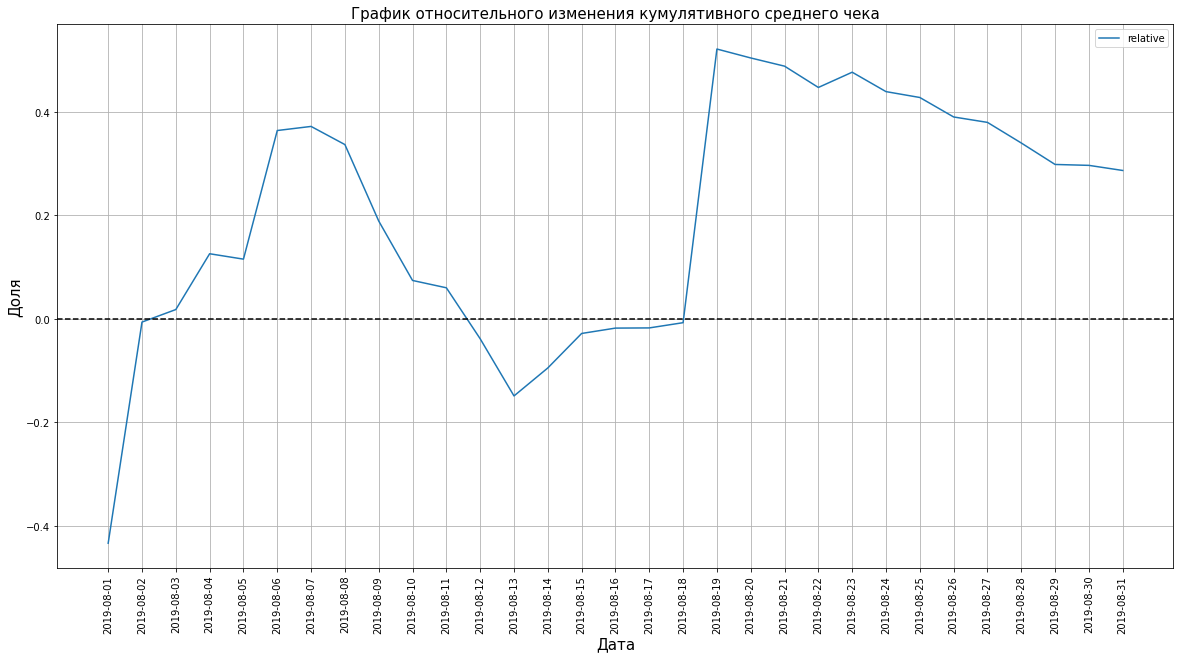

In [22]:
plt.figure(figsize=(20, 10))
plt.plot(cumulative['date'], cumulative['relative'], label='relative')
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(cumulative['date'], rotation = 90)
plt.title('График относительного изменения кумулятивного среднего чека', fontsize=15) #добавлено название графика
plt.xlabel('Дата', fontsize=15) #подписана ось х
plt.ylabel('Доля', fontsize=15) #подписана ось у
plt.legend()
plt.grid()
plt.show()

#### Вывод по анализу относительного изменения кумулятивных средних чеков групп А и В

По данным графика можно сделать вывод что средний чек группы В больше среднего чека группы А, возможно наличие статистичеких выбросов в периоды с 3 по 9 и с 18 по 19 августа - наличие крупных заказов в группе В в указанные периоды, наличие крупной выручки может свидетельствовать о наличии либо небольших но крупных заказов, либо о большом количестве заказов средней стоимости в группе В.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v1:</b>
    
Действительно, было бы полезно изучать данные без выбросов.

###  Кумулятивная конверсия по группам

Определим кумулятивные конверсии для групп А и В. Создадим таблицу с кумулятивным количеством визитов пользователей в интернет-магазин по дням.

In [23]:
visit_count = visitors.pivot_table(index='date', columns='group', values='visitors', aggfunc='sum').reset_index()
visit_count = visit_count.rename(columns={'A':'visit_count_A', 'B':'visit_count_B',})
visit_count['visit_cum_A'] = visit_count['visit_count_A'].cumsum(axis=0)
visit_count['visit_cum_B'] = visit_count['visit_count_B'].cumsum(axis=0)
print(visit_count.head())

group       date  visit_count_A  visit_count_B  visit_cum_A  visit_cum_B
0     2019-08-01            719            713          719          713
1     2019-08-02            619            581         1338         1294
2     2019-08-03            507            509         1845         1803
3     2019-08-04            717            770         2562         2573
4     2019-08-05            756            707         3318         3280


Соединим таблицу с кумулятивными визитами visit_count с таблицей кумулятивных значений cumulative. Также создадим и присоединим по датам таблицу покупателей - уникальных (по id) пользователей, совершавших заказы в определенный день.

In [24]:
bayer = orders.pivot_table(index='date', columns='group', values='visitor_id', aggfunc='nunique').reset_index()
bayer = bayer.rename(columns={'A':'bayer_A', 'B':'bayer_B',})
bayer['bayer_cum_A'] = bayer['bayer_A'].cumsum(axis=0)
bayer['bayer_cum_B'] = bayer['bayer_B'].cumsum(axis=0)
cumulative = cumulative.merge(visit_count, on='date', how='inner')
cumulative = cumulative.merge(bayer, on='date', how='inner')

Рассчитаем кумулятивную конверсию для каждой группы, разделим количество покупателей на визитеров для каждого дня.

In [25]:
cumulative['conv_A'] = cumulative['bayer_cum_A']/cumulative['visit_cum_A']
cumulative['conv_B'] = cumulative['bayer_cum_B']/cumulative['visit_cum_B']
print(cumulative[['conv_A', 'conv_B']].head())

group    conv_A    conv_B
0      0.026426  0.023843
1      0.027653  0.030139
2      0.033062  0.029395
3      0.028103  0.025651
4      0.028330  0.026524


Построим графики кумулятивной конверсии для групп А и В.

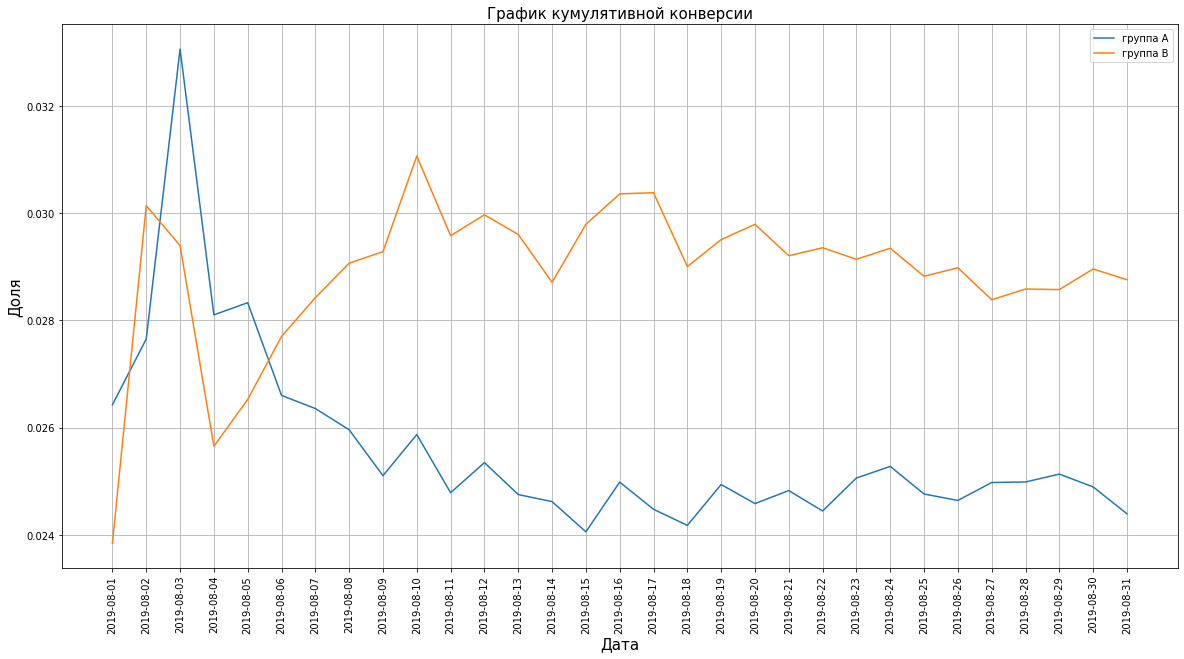

In [26]:
plt.figure(figsize=(20, 10))
plt.plot(cumulative['date'], cumulative['conv_A'], label='группа A')
plt.plot(cumulative['date'], cumulative['conv_B'], label='группа B')
plt.xticks(cumulative['date'], rotation = 90)
plt.title('График кумулятивной конверсии', fontsize=15) #добавлено название графика
plt.xlabel('Дата', fontsize=15) #подписана ось х
plt.ylabel('Доля', fontsize=15) #подписана ось у
plt.legend()
plt.grid()
plt.show()

#### Вывод по анализу кумулятивной конверсии по группам.

По данным графиков кумулятивной конверсии можно сделать следующие выводы:
- у кумулятивной конверсии группы А наблюдается резкий спад в период с 3 по 9 августа;
- кумулятивная конверсия группы В резко возрастает в период с 4 по 10 августа;
- в период с 11 августа и до окнчания проведения А/В теста конверсии в группах А и В стабилизировались, значительные выбросы отсутствуют.

<div class="alert alert-success">
<b>Комментарий ревьюера v1:</b>
    
Верные результаты и выводы, а на основании данного графика легче сказать, что группа B действительно лучше.



### Анализ относительного изменения кумулятивных конверсий групп А и В

Определим относительное изменение кумулятивных конверсий между группами А и В.

In [27]:
cumulative['relative_conv'] = (cumulative['conv_B']/cumulative['conv_A'])-1
print(cumulative['relative_conv'].head())

0   -0.097734
1    0.089895
2   -0.110908
3   -0.087252
4   -0.063745
Name: relative_conv, dtype: float64


Построим график относительного изменения кумулятивных конверсий между группами А и В.

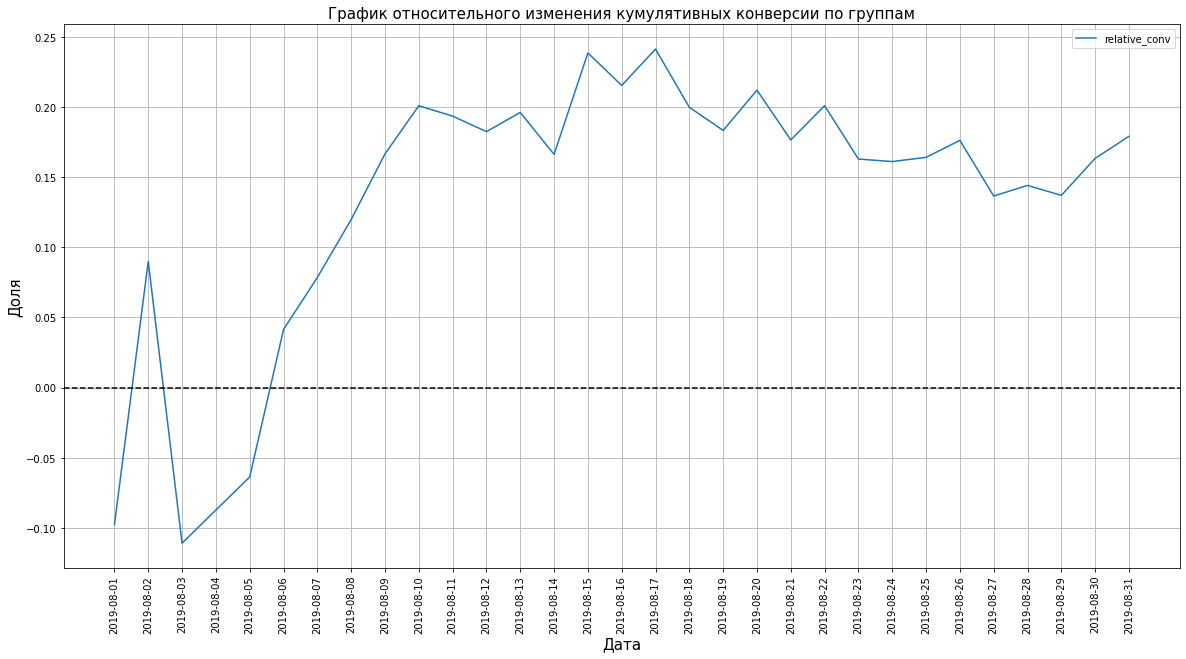

In [28]:
plt.figure(figsize=(20, 10))
plt.plot(cumulative['date'], cumulative['relative_conv'], label='relative_conv')
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(cumulative['date'], rotation = 90)
plt.title('График относительного изменения кумулятивных конверсии по группам', fontsize=15) #добавлено название графика
plt.xlabel('Дата', fontsize=15) #подписана ось х
plt.ylabel('Доля', fontsize=15) #подписана ось у
plt.legend()
plt.grid()
plt.show()

#### Вывод по анализу относительного изменения кумулятивных конверсий между группами А и В

По данным графика относительного изменения кумулятивной конверсии можно сделать следующие выводы:
- в основном кумулятивная конверсия группы В опережает конверсию группы А
- наблюдается резкий рост превышения кумулятивной конверсии группы В на конверсией группы А в период с 5 по 10 августа;
- в период с 22 по 31 августа (окончание А/В-теста) относительное изменение кумулятивных конверсий стабилизировалось, значительные выбросы отсутствуют.

<div class="alert alert-success">
<b>Комментарий ревьюера v1:</b>
    

    
Действительно тут можно отметить небольшую стаблизацию результатов теста после  около определенного значения после 21.08
    
Здорово, что получилось применить тут plt.axhline.
    


### График количества заказов по пользователям

Опеределм количество совершенных заказов каждым пользователем.

In [29]:
order_count = orders.pivot_table(index=['visitor_id', 'group'], values='transaction_id', aggfunc='count').reset_index()
print(order_count.head())

   visitor_id group  transaction_id
0     5114589     B               1
1     6958315     B               1
2    11685486     A               1
3    39475350     B               1
4    47206413     B               1


Построим точечный график количества заказов по пользователям.

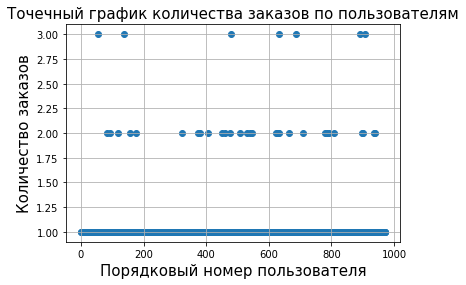

In [30]:
x_values = pd.Series(range(0,len(order_count)))
plt.scatter(x_values, order_count['transaction_id'])
plt.title('Точечный график количества заказов по пользователям', fontsize=15) #добавлено название графика
plt.xlabel('Порядковый номер пользователя', fontsize=15) #подписана ось х
plt.ylabel('Количество заказов', fontsize=15) #подписана ось у
plt.grid()

<div class="alert alert-info"> <b>Комментарий студента:</b> Уточнен вывод по результатам пересчета и устранение прежних ошибок</div>

#### Вывод по результатам анализа графика количества заказов по пользователям

В основном пользователи за период проведения А/В тестов делали по 1 заказу, реже - по 2 заказа. Зафиксировано всего 7 пользователей, сделавших 3 заказа.

### Выбор границы для определения аномальных значений количества заказов

Определим выборочные перцентили количества заказов на одного пользователя. Определим 90, 95 и 99 перцентили количества заказов для каждого пользователя.

In [31]:
print(np.percentile(order_count['transaction_id'], [90, 95, 99])) 

[1. 1. 2.]


<div class="alert alert-info"> <b>Комментарий студента:</b> Уточнен вывод по результатам пересчета и устранение прежних ошибок</div>

#### Вывод по границам аномальных значений количества заказов

По данным расчетов 90, 95 и 99 перцентилей можно сделать вывод о том, что менее 1% пользователей оформляли 2 и более заказов. Определим верхнюю границу количества заказов на пользователя как 2 и более заказа, т.е. "очищенными" от выбросов будут считаться данные по пользователям, оформивших максимум 1 заказ, пользователи, оформившие 2 и более заказов будут считаться аномальными.

### График стоимостей заказов

Построим точечный график стоимостей заказов.

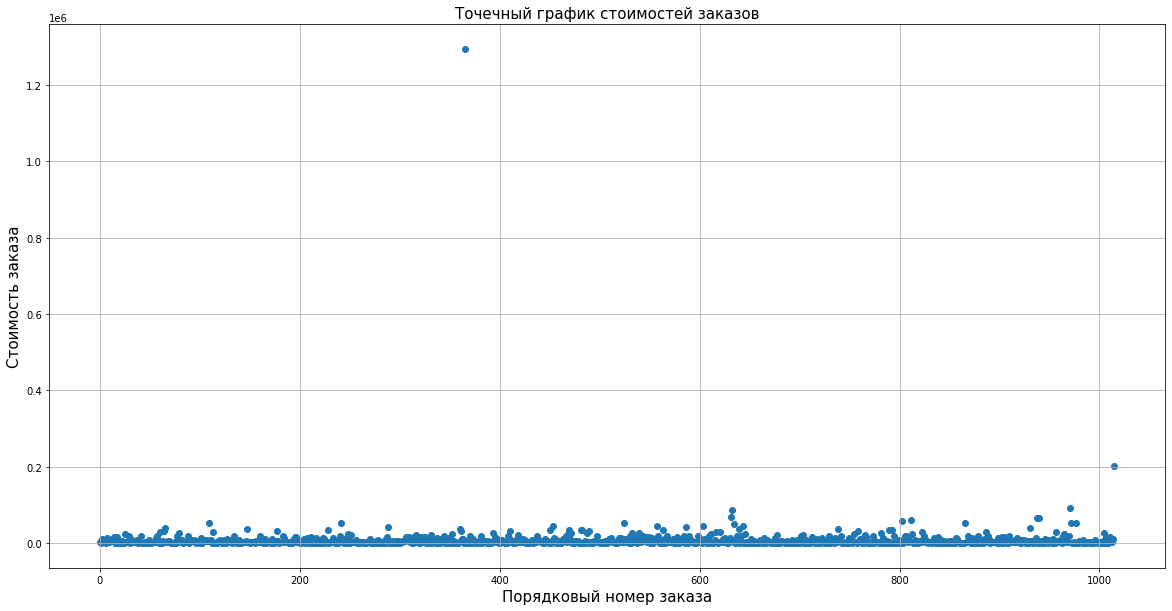

In [32]:
plt.figure(figsize=(20, 10))
x_values = pd.Series(range(0,len(orders)))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов', fontsize=15) #добавлено название графика
plt.xlabel('Порядковый номер заказа', fontsize=15) #подписана ось х
plt.ylabel('Стоимость заказа', fontsize=15) #подписана ось у
plt.grid()

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v1:</b>
    
Можно также выделить две группы на этом графике, используя параметр hue:  (https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

Можно построить еще один график, но уже без выбросов.

#### Вывод по результатам анализа графика стоимостей заказов

По данным точечного графика заказов определно, что больше всего сделано заказов со стоимостью не более 100 000, зафиксировано два значения, превышающих это значение - заказ со стоимостью 200 000 и заказ со стоимостью более 1 200 000. Вероятнее всего данные заказы совершены крупными организациями и являются статистическими выбросами.

### Выбор границы для определения аномальных значений стоимостей заказов

Определим выборочные перцентили стоимости заказов. Определим 90, 95 и 99 перцентили.

In [33]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[17990. 26785. 53904.]


<div class="alert alert-info"> <b>Комментарий студента:</b> Уточнен вывод по результатам пересчета и устранение прежних ошибок</div>

#### Вывод по границам аномальных значений стоимостей заказов

По данным расчетов 90, 95 и 99 перцентилей можно сделать вывод о том, что менее 5% заказов имеют стоимость более 26 785, менее 1% заказов имеют стоимость более 53 904. Определим верхнюю границу стоимости заказа 26 785, т.е. "очищенными" от выбросов будут считаться заказы со стоимостью 26 785 и менее, заказы со стоимостью более 26 785 будут считаться аномальными.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v1:</b>
    
Диаграммы рассеяния и выбросы по 90, 95 и по 99 персентилю определены полностью верно.

### Расчет статистической значимости различий в среднем количестве заказов между группами по "сырым" данным

Определим количество заказов в каждой группе для каждого уникального покупателя. Создадим таблицу, где для каждого уникального пользователя найдем количество заказов за все время проведения А/В-теста по "сырым" данным.

<div class="alert alert-info"> <b>Комментарий студента:</b> Код уточнен</div>

<div class="alert alert-info"> <b>Комментарий студента 2:</b> Код уточнен в части количества пользователей, добавлены пользователи из таблицы visitors, не совершавшие покупок</div>

In [34]:
#countA = order_count[count_orders['group']=='A'] - старый код с ошибкой
#countB = order_count[count_orders['group']=='B'] - старый код с ошибкой
countA = order_count[order_count['group']=='A'] #новый код
countB = order_count[order_count['group']=='B'] #новый код
#новый код 2: добавление пользователей, которые не оформляли заказов
sampleA = pd.concat([countA['visitor_id'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(countA['visitor_id'])), name='orders')],axis=0)
sampleB = pd.concat([countB['visitor_id'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(countB['visitor_id'])), name='orders')],axis=0)

<div class="alert alert-danger">
<b>Комментарий ревьюера v1:</b>
    
К сожалению, в коде выше закралась ошибка. Поправишь, пожалуйста?

Советую всегда запускать проект еще раз на серверах заказчика перед отправкой работы, чтобы избежать возможных ошибок. Можно сделать это, используя: Kernel -> Restart & Run All 

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>
    
Спасибо, что поправил, теперь все выполняется корректно.

Посчитаем статистическую значимость различий в среднем количестве заказов. Определим нулевую гипотезу - различий в среднем количестве заказов между группами нет. Альтернативная гипотеза - различия в среднем количестве заказов между группами есть. Критический уровень статистической значимости примем равным 0,05. Также определим относительное различие среднего количества заказов группы В к группе А.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>
    
Гипотезы сформулированы верно.

In [35]:
results = stats.mannwhitneyu(sampleA, sampleB)[1]
print('p-значение: ', results)
alpha = 0.05
if results < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    ) 
print('Относительное различие среднего количества заказов:' "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-значение:  0.011161739074157016
Отвергаем нулевую гипотезу: разница статистически значима
Относительное различие среднего количества заказов:0.157


<div class="alert alert-danger">
<b>Комментарий ревьюера v2:</b>
    
В данном случае нам требуется проверить метрику о среднем количестве заказов между группами. Сейчас у нас только пользователи с заказами, что искажает среднее. Для этого нужно дополнительно добавить 0 для заказов всем посетителям, которые ничего не купили. Добавить неактивных пользователей можно следующим образом:
    
    sampleA = pd.concat([countA['...'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(countA['...'])), name='...')],axis=0)

Поправить, пожалуйста, сборку выборок для первой гипотезы и выводы к результатам?


#### Вывод по результатам расчета статистической значимости различий количества заказов по "сырым" данным

СТАРЫЙ ВЫВОД!:
По результатам теста определено, что различий в среднем количестве заказов между группами нет, относительное различие среднего количества заказов в группе А превышает тоже значение для группы В на 1,3%.

НОВЫЙ ВЫВОД!: По результатам теста определено наличие различий в количестве заказов между группами А и В, относительное различие среднего кличества заказов в группе В превышает тот же параметр для группы А на 15,7%.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v3:</b>

Верные выводы! 

### Расчет статистической значимости различий в среднем чеке заказов между группами по "сырым" данным

Посчитаем статистическую значимость различий в среднем чеке заказов. Определим нулевую гипотезу - различий в среднем чеке между группами нет. Альтернативная гипотеза - различия в среднем чеке между группами есть. Критический уровень статистической значимости примем равным 0,05. Также определим относительное различие чека группы В к чеку группы А.

In [36]:
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('p-значение: ', results)
alpha = 0.05
if results < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    ) 
print('Относительное различие среднего чека:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-значение:  0.8294908998149533
Не получилось отвергнуть нулевую гипотезу
Относительное различие среднего чека: 0.287


#### Вывод по результатам расчета статистической значимости различий средних чеков по "сырым" данным

По результатам теста определено, что различий в среднем чеке между группами нет, относительное различие среднего чека в группе В превышает тоже значение для группы А на 28%.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v1:</b>
    
Верные выводы.

### Расчет статистической значимости различий в среднем количестве заказов между группами по "очищенным" данным

Подготовим данные для расчета статистической значимости различий в среднем количестве заказов между группами. Создадим таблицы countA_cl и countB_cl где будут представлены идентификаторы пользователей и количество их заказов за все время проведения А/В-теста в группах А и В соответственно. В таблицы попадут только пользователи, которые оформили максимум 1 заказ.

In [37]:
countA_cl = countA[countA['transaction_id']<2]
countB_cl = countB[countB['transaction_id']<2]
#новый код 2: добавление пользователей, которые не оформляли заказов
sampleA_cl = pd.concat([countA_cl['visitor_id'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(countA_cl['visitor_id'])), name='orders')],axis=0)
sampleB_cl = pd.concat([countB_cl['visitor_id'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(countB_cl['visitor_id'])), name='orders')],axis=0)

Посчитаем статистическую значимость различий в среднем количестве заказов по "очищенным" данным. Определим нулевую гипотезу - различий в среднем количестве заказов между группами нет. Альтернативная гипотеза - различия в среднем количестве заказов между группами есть. Критический уровень статистической значимости примем равным 0,05. Также определим относительное различие среднего количества заказов группы В к группе А.

In [38]:
results = stats.mannwhitneyu(sampleA_cl, sampleB_cl)[1]
print('p-значение: ', results)
alpha = 0.05
if results < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    ) 
print('Относительное различие среднего количества заказов:' "{0:.3f}".format(sampleB_cl.mean() / sampleA_cl.mean() - 1))

p-значение:  0.009584215683864472
Отвергаем нулевую гипотезу: разница статистически значима
Относительное различие среднего количества заказов:0.163


<div class="alert alert-danger">
<b>Комментарий ревьюера v2:</b>
    
Здесь такой же комментарий.

#### Вывод по результатам расчета статистической значимости различий количества заказов по "очищенным" данным

СТАРЫЙ ВЫВОД!:
По результатам теста определено, что различий в среднем количестве заказов по "очищенным" от аномалий данным между группами нет, относительное различие среднего количества заказов, рассчитанное по "очищенным" от аномалий данным отсутствует.

НОВЫЙ ВЫВОД!: По результатам теста определено наличие различий в количестве заказов между группами А и В по "очищенным" от аномалий данным, относительное различие среднего кличества заказов в группе В превышает тот же параметр для группы А на 16,3%.

### Расчет статистической значимости различий в среднем чеке заказов между группами по "очищенным" данным

Подготовим данные для расчета статистической значимости различий в среднем чеке между группами. Создадим таблицы revA_cl и revB_cl где будут представлены стоимости заказов за все время проведения А/В-теста в группах А и В соответственно по "очищенным" от аномалий данным. В таблицы попадут только те заказы, стоимость которых не превышает 26 785.

In [39]:
max_revenue =  int(np.percentile(orders['revenue'], [95])) #введена граница максимальной стоимости заказов
revA_cl = orders[(orders['revenue']<=max_revenue) & (orders['group']=='A')]
revB_cl = orders[(orders['revenue']<=max_revenue) & (orders['group']=='B')]
print(revA_cl.head())
print(revB_cl.head())

    transaction_id  visitor_id       date  revenue group
7       2626614568    78758296 2019-08-15     1044     A
8       1576988021   295230930 2019-08-15    13710     A
10      3649131742   879864040 2019-08-15     4008     A
12      2809384911  3213223594 2019-08-15     7370     A
14      3859315276  1565034404 2019-08-15    10980     A
   transaction_id  visitor_id       date  revenue group
0      3667963787  3312258926 2019-08-15     1650     B
1      2804400009  3642806036 2019-08-15      730     B
3      3797467345  1196621759 2019-08-15     9759     B
4      2282983706  2322279887 2019-08-15     2308     B
5       182168103   935554773 2019-08-15     2210     B


<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера v2:</b>
    
В коде лучше отказаться от использования числовых переменных, ведь данные могут обновиться и результаты уже будут не верные. Лучше использовать код вместо ручного ввода цифр. Это снизит возможные ошибки при повторном использовании кода.
    
Можно просто создать переменные куда передаются значения перцентилей или же вставить это прямо в выбор данных: 
    
    max_revenue =  int(np.percentile(orders["orders"], [95]))

Посчитаем статистическую значимость различий в среднем чеке по "очищенным" данным. Определим нулевую гипотезу - различий в среднем чеке между группами нет. Альтернативная гипотеза - различия в среднем чеке между группами есть. Критический уровень статистической значимости примем равным 0,05. Также определим относительное различие среднего чека группы В к группе А.

In [40]:
results = stats.mannwhitneyu(revA_cl['revenue'], revB_cl['revenue'])[1]
print('p-значение: ', results)
alpha = 0.05
if results < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    ) 
print('Относительное различие среднего чека:', '{0:.3f}'.format(revB_cl['revenue'].mean()/revA_cl['revenue'].mean()-1))

p-значение:  0.6986767755765741
Не получилось отвергнуть нулевую гипотезу
Относительное различие среднего чека: -0.059


#### Вывод по результатам расчета статистической значимости различий стоимости заказов по "очищенным" данным

По результатам теста определено, что различий в среднем чеке по "очищенным" от аномалий данным между группами нет, относительное различие среднего чека, рассчитанное по "очищенным" от аномалий данным, в группе А превышает тоже значение для группы В на 5.9%.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v3:</b>
    
У тебя верные результаты для всех тестов. 
    
Также хочу добавить, что критерий Манна-Уитни ранговый поэтому он устойчив к выбросам. 
Это означает, что данные ранжируются, выброс будет просто распознаваться как случай, который ранжируется на единицу выше (или ниже) следующего наблюдения, поэтому сильного влияния на p-value выбросы не оказывают.

### Вывод по результатам А/В-теста

Результаты А/В-теста:
- существует статистически значимое различие по среднему количеству заказов между группами А и В как по "сырым", так и по "очищенным" данным;
- статистически значимого различия по среднему чеку между группами А и В ни по "сырым", ни по "очищенным" данным нет;
- относительное изменение количества заказов между группами отличается после удаления аномалий - после "очистки" данных относительное изменение количества заказов группы В к группе А  составило 16,3%;
- относительное изменение среднего чека между группами отличается полсе удаления аномалий - после "очистки" данных относительное изменение среднего чека группы А к группе В составило 5,9%.

СТАРЫЙ ВЫВОД!:

По результатам А/В-тестирования можно сделать вывод, что статистически значимого различия по проверяемым параметрам между группами А и В нет, относительные изменения по очищенным от аномальных значений данным вцелом не отличаются (среднее количество заказов заказов по "очищенным" данным одинаково, однако в группе А больше значение среднего чека). Также с учетом того, что графики кумулятивной конверсии в конце проведения теста устойчивы, а преобладание кумулятивных параметров в группе В над параметрами группы А вероятнее всего происходит по причине аномальных значений стоимости заказа и количества заказов (оценка проводилась по "сырым" данным), то можно сделать вывод что А/В-тестирование можно остановить, группа А лидирует по среднему чеку по результатам анализа "очищенных" данных.

НОВЫЙ ВЫВОД!:

По результатам А/В-тестирования можно сделать вывод, что существует статистически значимое различие по среднму количеству заказов между группами А и В по "очищенным" от аномальных значений данным, относительное изменение среднего количества заказов группы В над группой А больше на 16,3%. Статистически значимых различий между средними чеками групп А и В нет, отноительное изменние среднего чека группы А над группой Б больше на 5,9%. Также с учетом того, что графики кумулятивной конверсии в конце проведения теста устойчивы, а преобладание кумулятивных параметров в группе В над параметрами группы А вероятнее всего происходит по причине аномальных значений стоимости заказа и количества заказов (оценка проводилась по "сырым" данным), то можно сделать вывод что А/В-тестирование можно остановить, группа В лидирует по среднему количеству заказов по результатам анализа "очищенных" данных.

## Общий вывод по проекту

В ходе проекта проведена следующая работа:
1. Проведена предобработка данных.
2. Проведена приоритизация гипотез - наиболее приоритетной выбрана гипотеза под номером 7.
3. Проведен анализ результатов А/В-тестирования, получены результаты как по "сырым" так и по "очищенным" от аномальных значений данным.
4. По результатам А/В-тестирования сделан вывод о прекращении теста, лидирует группа В по преобладанию среднего количества заказов.

<div class="alert alert-danger">
<b>Комментарий ревьюера v2:</b>
    
Общие выводы могут поменяться.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v3:</b>
    
    
Спасибо за проделанную работу и классный проект  🤝

Отличное исследование с правильными промежуточными выводами, чистым кодом и хорошей визуализацией. У тебя получилось верно применить фреймворки для тестирования гипотез, выявить аномалии в данных и провести все статистические проверки. 
    
Также полностью согласен с твоими итогами теста. В данном проекте можно попасть в "ловушку подглядывания" и ждать пока появится разница в средних чеках, но делать так неправильно. Подробнее почитать можно тут: https://gopractice.ru/how-not-to-analyze-abtests/
    
    